In [1]:
from urllib.request import urlopen
import sys
import numpy as np

# read data from UC Irvine data library
target_url = ("https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data"
             )
data = urlopen(target_url)


xList = []
labels = []
for line in data:
    line = line.decode('utf-8')
    row=line.split(",")
    xList.append(row)

    
# count number of rows and columns   
sys.stdout.write("Number of Rows of data =" + str(len(xList))+ '\n')   
sys.stdout.write("Number of Columns of data =" + str(len(xList[1]))+ '\n')   
#print(xList)    

# count number of numerical and categorical values in each feature type0 number, type1 string, type2 other
nrow = len(xList)
ncol = len(xList[1])

type = [0]*3
colCounts = []

for col in range(0,ncol):
    for row in xList:
        try:
            a = float(row[col])
            if isinstance(a,float):
                type[0] += 1
        except ValueError:
            if len(row[col]) > 0:
                type[1] += 1
            else:
                type[2] += 2
    colCounts.append(type)
    type = [0]*3
    #print(colCounts)

sys.stdout.write("Col#"+'\t'+"Number"+'\t'+"Strings"+'\t'+"Others\n")
icol = 0
for type in colCounts:
    sys.stdout.write(str(icol)+'\t\t'+str(type[0])+'\t\t'+str(type[1])+'\t\t'+str(type[2])+"\n")
    icol += 1

    
    
# get statistical information of data
# generate summary statistics for column3
col =3
colData=[]
for row in xList:
    colData.append(float(row[col]))
#print(colData)
colArray = np.array(colData)
colmean  = np.mean(colArray)
colsd    = np.std(colArray)

sys.stdout.write("Mean =" + '\t' + str(colmean) +'\t\t' + "Standard Deviation =" + '\t' + str(colsd) + "\n")


# find abnormal values or extreme values  find quantile boundaries
ntile = 4
percentBdry = []
for i in range(ntile+1):
    percentBdry.append(np.percentile(colArray,i*(100)/ntile))

sys.stdout.write("\nBoundaries for 4 Equal Percentiles \n")
print(percentBdry)
sys.stdout.write(" \n")

# try again with 10 equak intervals
ntile = 10
percentBdry = []
for i in range(ntile+1):
    percentBdry.append(np.percentile(colArray,i*(100)/ntile))

sys.stdout.write("\nBoundaries for 10 Equal Percentiles \n")
print(percentBdry)
sys.stdout.write(" \n")

# the last column is special since it is categorical 
# firstly see how many distinct categories we have

col = 60
colData=[]
for row in xList:
    colData.append(row[col])
unique = set(colData)
sys.stdout.write("Unique Label Values \n")
print(unique)

# count how many elements in each category
catDict = dict(zip(list(unique),range(len(unique))))
print(catDict)
catCount = [0]*2
for elt in colData:
    catCount[catDict[elt]] += 1
sys.stdout.write("\nCounts for Each Value of Categorical Label \n")
print(list(unique))
print(catCount)

Number of Rows of data =208
Number of Columns of data =61
Col#	Number	Strings	Others
0		208		0		0
1		208		0		0
2		208		0		0
3		208		0		0
4		208		0		0
5		208		0		0
6		208		0		0
7		208		0		0
8		208		0		0
9		208		0		0
10		208		0		0
11		208		0		0
12		208		0		0
13		208		0		0
14		208		0		0
15		208		0		0
16		208		0		0
17		208		0		0
18		208		0		0
19		208		0		0
20		208		0		0
21		208		0		0
22		208		0		0
23		208		0		0
24		208		0		0
25		208		0		0
26		208		0		0
27		208		0		0
28		208		0		0
29		208		0		0
30		208		0		0
31		208		0		0
32		208		0		0
33		208		0		0
34		208		0		0
35		208		0		0
36		208		0		0
37		208		0		0
38		208		0		0
39		208		0		0
40		208		0		0
41		208		0		0
42		208		0		0
43		208		0		0
44		208		0		0
45		208		0		0
46		208		0		0
47		208		0		0
48		208		0		0
49		208		0		0
50		208		0		0
51		208		0		0
52		208		0		0
53		208		0		0
54		208		0		0
55		208		0		0
56		208		0		0
57		208		0		0
58		208		0		0
59		208		0		0
60		0		208		0
Mean =	0.0538923076923		Standard Deviation =	0.0464159832226

Boundarie

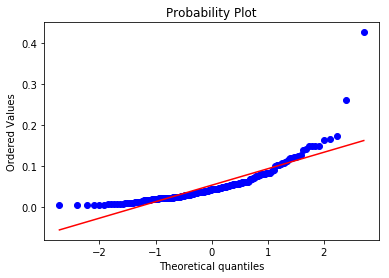

In [5]:
# plot qqplot and we can see the departure of our data from normal distribution
import scipy.stats as stats
import pylab
col =3 
colData = []
for row in xList:
    colData.append(float(row[col]))
stats.probplot(colData,dist="norm",plot=pylab)
pylab.show()

In [10]:
# now let's use pandas
import pandas as pd
rocksVMines = pd.read_csv(target_url,header=None,prefix="V")
#print(rocksVMines)
print(rocksVMines.head())
print(rocksVMines.tail())
summary = rocksVMines.describe()
print(summary)



       V0      V1      V2      V3      V4      V5      V6      V7      V8  \
0  0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1  0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2  0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3  0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4  0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   

       V9 ...      V51     V52     V53     V54     V55     V56     V57  \
0  0.2111 ...   0.0027  0.0065  0.0159  0.0072  0.0167  0.0180  0.0084   
1  0.2872 ...   0.0084  0.0089  0.0048  0.0094  0.0191  0.0140  0.0049   
2  0.6194 ...   0.0232  0.0166  0.0095  0.0180  0.0244  0.0316  0.0164   
3  0.1264 ...   0.0121  0.0036  0.0150  0.0085  0.0073  0.0050  0.0044   
4  0.4459 ...   0.0031  0.0054  0.0105  0.0110  0.0015  0.0072  0.0048   

      V58     V59  V60  
0  0.0090  0.0032    R  
1  0.0052  0.0044    R  
2  0.0095  0.0078

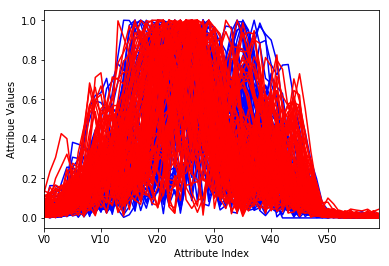

In [11]:
# parallel coordinates plot, every line is data in a row

import matplotlib.pyplot as plot
for i in range(208):
    if rocksVMines.iloc[i,60] =='M':
        pcolor = "red"
    else:
        pcolor = "blue"
    dataRow = rocksVMines.iloc[i,0:60]
    dataRow.plot(color=pcolor)
plot.xlabel("Attribute Index")
plot.ylabel("Attribue Values")
plot.show()

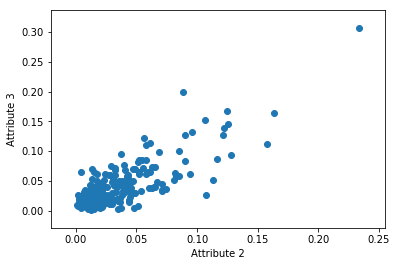

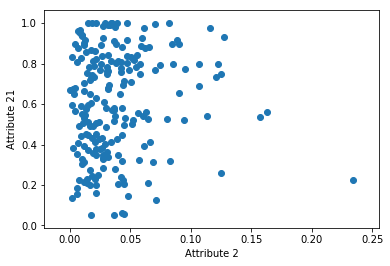

In [19]:
# also need to plot cross-plots between pairs of features
# plot feature 2 versus feature 3
datarow2 = rocksVMines.iloc[0:208,1]
datarow3 = rocksVMines.iloc[0:208,2]
#datarow2 = rocksVMines.iloc[1,0:60]
#datarow3 = rocksVMines.iloc[2,0:60]
#plot.axis([0,1.2,0,1.0])
plot.scatter(datarow2,datarow3)
plot.xlabel("Attribute 2")
plot.ylabel(("Attribute 3"))
plot.show()
# plot feature 2 versus feature 21

datarow21 = rocksVMines.iloc[0:208,20]
plot.scatter(datarow2,datarow21)
plot.xlabel("Attribute 2")
plot.ylabel(("Attribute 21"))
plot.show()

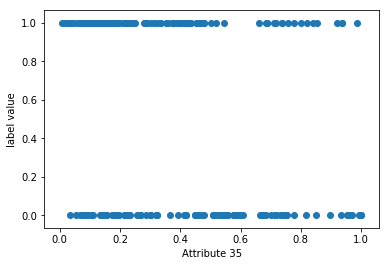

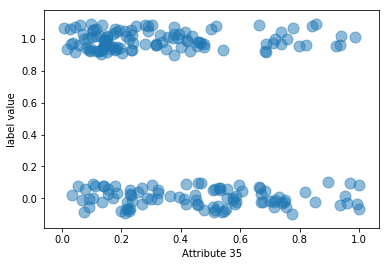

In [26]:
# plot the relation between a feature and a label
# we choose feature with feature value 35
target= []
for i in range(208):
    if rocksVMines.iloc[i,60] == 'M':
        target.append(1.0)
    else:
        target.append(0.0)
datarow = rocksVMines.iloc[0:208,35]
plot.scatter(datarow,target)
plot.xlabel("Attribute 35")
plot.ylabel(("label value"))
plot.show()


# now we can improve the effect of visualization
from random import uniform
target= []
for i in range(208):
    if rocksVMines.iloc[i,60] == 'M':
        target.append(1.0+uniform(-0.1,0.1))
    else:
        target.append(0.0+uniform(-0.1,0.1))
plot.scatter(datarow,target,alpha = 0.5, s=120)
plot.xlabel("Attribute 35")
plot.ylabel(("label value"))
plot.show()
        

In [29]:
# calculate the pearson correlation coefficient between 2 features
from math import sqrt
datarow2 = rocksVMines.iloc[0:208,1]
datarow3 = rocksVMines.iloc[0:208,2]
datarow21 = rocksVMines.iloc[0:208,20]

mean2 = 0.0
mean3 = 0.0
mean21 = 0.0
numElt = len(datarow2)
for i in range(numElt):
    mean2 += datarow2[i]/numElt
    mean3 += datarow3[i]/numElt
    mean21 += datarow21[i]/numElt
var2 = 0.0
var3 = 0.0
var21 = 0.0
for i in range(numElt):
    var2 += (datarow2[i]-mean2)*(datarow2[i]-mean2)
    var3 += (datarow3[i]-mean3)*(datarow3[i]-mean3)
    var21 += (datarow21[i]-mean21)*(datarow21[i]-mean21)

corr23 = 0.0
corr221 = 0.0
for i in range(numElt):
    corr23 += ((datarow2[i]-mean2)*(datarow3[i]-mean3))/(sqrt(var2*var3))
    corr221 += ((datarow2[i]-mean2)*(datarow21[i]-mean21))/(sqrt(var2*var21))
sys.stdout.write("Correlation between attribute 2 and 3 \n")
print(corr23)
sys.stdout.write(" \n")
sys.stdout.write("Correlation between attribute 2 and 21 \n")
print(corr221)
sys.stdout.write(" \n")
print(rocksVMines.corr())

Correlation between attribute 2 and 3 
0.77991587191
 
Correlation between attribute 2 and 21 
0.0752552867912
 
           V0        V1        V2        V3        V4        V5        V6  \
V0   1.000000  0.735896  0.571537  0.491438  0.344797  0.238921  0.260815   
V1   0.735896  1.000000  0.779916  0.606684  0.419669  0.332329  0.279040   
V2   0.571537  0.779916  1.000000  0.781786  0.546141  0.346275  0.190434   
V3   0.491438  0.606684  0.781786  1.000000  0.726943  0.352805  0.246440   
V4   0.344797  0.419669  0.546141  0.726943  1.000000  0.597053  0.335422   
V5   0.238921  0.332329  0.346275  0.352805  0.597053  1.000000  0.702889   
V6   0.260815  0.279040  0.190434  0.246440  0.335422  0.702889  1.000000   
V7   0.355523  0.334615  0.237884  0.246742  0.204006  0.471683  0.675774   
V8   0.353420  0.316733  0.252691  0.247078  0.177906  0.327578  0.470580   
V9   0.318276  0.270782  0.219637  0.237769  0.183219  0.288621  0.425448   
V10  0.344058  0.297065  0.274610  0.271

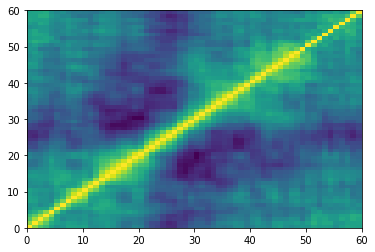

In [31]:
# heat map of the correlation
from pandas import DataFrame
corMat = DataFrame(rocksVMines.corr())
plot.pcolor(corMat)
plot.show()